<a href="https://colab.research.google.com/github/nikhil1234108/data-science/blob/main/customnetworkdesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

nikhil sai
21BLC1382

the main objective is designing the custom neural network.


importing the required librarys


In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
from keras import models
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [55]:
df=pd.read_excel('measures.xlsx')

In [56]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,5,2.4,0.45,0.4,S1
1,7.4,2.5,0.4,0.5,S1
2,10.4,4.0,0.4,0.6,S1
3,5,3.8,0.4,0.7,S1
4,9.4,4.4,0.4,0.7,S1
...,...,...,...,...,...
313,2.1,1.8,0.3,0.5,S5
314,0.4,1.6,0.3,0.4,S5
315,3.8,2.5,0.4,0.6,S5
316,2.5,2.3,0.4,0.4,S5


In [57]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,5,2.4,0.45,0.4,S1
1,7.4,2.5,0.4,0.5,S1
2,10.4,4.0,0.4,0.6,S1
3,5,3.8,0.4,0.7,S1
4,9.4,4.4,0.4,0.7,S1


In [58]:
df.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
313,2.1,1.8,0.3,0.5,S5
314,0.4,1.6,0.3,0.4,S5
315,3.8,2.5,0.4,0.6,S5
316,2.5,2.3,0.4,0.4,S5
317,4.9,2.8,0.4,0.5,S5


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  318 non-null    object 
 1   Unnamed: 1  318 non-null    float64
 2   Unnamed: 2  318 non-null    object 
 3   Unnamed: 3  318 non-null    object 
 4   Unnamed: 4  318 non-null    object 
dtypes: float64(1), object(4)
memory usage: 12.5+ KB


In [70]:
df=df.replace('-',np.nan)

In [61]:
df.isnull().sum()

,0
Unnamed: 0,7
Unnamed: 1,0
Unnamed: 2,31
Unnamed: 3,30
Unnamed: 4,0


In [62]:
df.describe()

,Unnamed: 1
count,318.000000
mean,1.873899
std,0.713311
min,0.200000
25%,1.400000
50%,1.900000
75%,2.400000
max,4.400000


<Axes: >

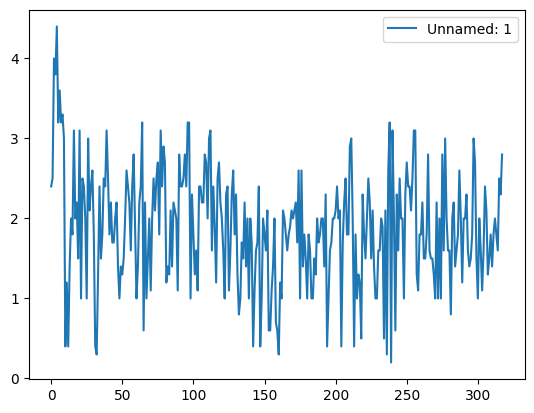

In [103]:
df.plot()

<Axes: xlabel='Unnamed: 2'>

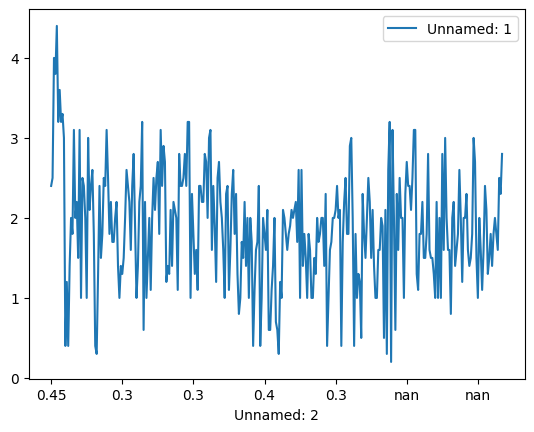

In [107]:
df.plot(x=df.columns[2])

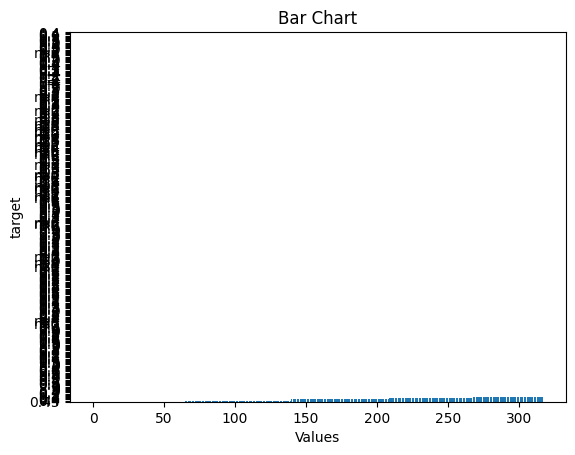

In [113]:
import matplotlib.pyplot as plt

plt.bar(df.index, df.iloc[:, 4])
plt.yticks(df.index, df.iloc[:, 2])
plt.xlabel('Values')
plt.ylabel('target')
plt.title('Bar Chart')
plt.show()

<Axes: >

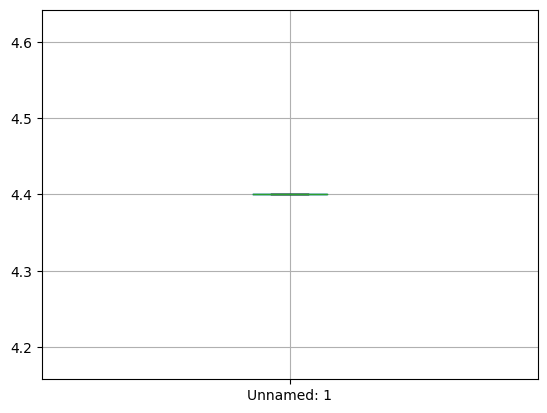

In [124]:
a=df.iloc[4:5]
a.boxplot()

In [64]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [65]:
df=pd.DataFrame(df)

In [68]:
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(254, 4)
(64, 4)
(254,)
(64,)


In [86]:
import pandas as pd
import numpy as np

x_train = x_train.replace('—', np.nan)
x_train = x_train.fillna(x_train.mean())

x_test = x_test.replace('—', np.nan)
x_test = x_test.fillna(x_test.mean())


In [93]:
network=models.Sequential()
network.add(Dense(8,activation='relu',input_shape=(x_train.shape[1],)))
network.add(Dense(4,activation='sigmoid'))
network.add(Dense(len(np.unique(y)),activation='softmax'))
from keras.optimizers import SGD



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
network.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [101]:
network.fit(x_train,y_train,epochs=500,batch_size=10,validation_data=(x_test,y_test))

Epoch 1/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3951 - loss: 1.3828 - val_accuracy: 0.3906 - val_loss: 1.3500
Epoch 2/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3831 - loss: 1.3693 - val_accuracy: 0.3906 - val_loss: 1.3538
Epoch 3/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4054 - loss: 1.4117 - val_accuracy: 0.3906 - val_loss: 1.3611
Epoch 4/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4133 - loss: 1.3847 - val_accuracy: 0.3750 - val_loss: 1.3635
Epoch 5/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4245 - loss: 1.3454 - val_accuracy: 0.3750 - val_loss: 1.3652
Epoch 6/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4172 - loss: 1.3853 - val_accuracy: 0.3750 - val_loss: 1.3629
Epoch 7/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4459 - loss: 1.3759 - val_accuracy: 0.3906 - val_loss: 1.3592
Epoch 8/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4082 - loss: 1.3846 - val_accuracy: 0.3906 - v

In [102]:
loss, accuracy = network.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

predictions = network.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

print(f'Predicted classes: {predicted_classes}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4062 - loss: 1.3456 
Accuracy: 39.06%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Predicted classes: [1 1 0 0 1 1 4 2 0 2 0 1 0 1 1 0 2 2 1 0 1 1 4 1 0 1 4 0 1 4 4 0 1 1 4 1 3
 2 2 3 1 0 1 1 0 1 1 1 1 1 1 1 4 0 0 4 0 0 0 1 1 1 1 0]


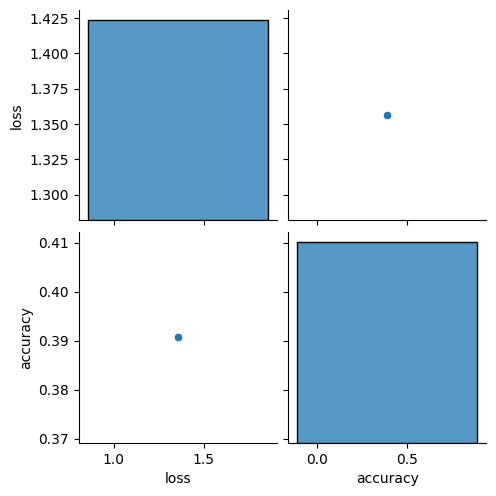

In [127]:
index = [0]
df = pd.DataFrame({'loss': [loss], 'accuracy': [accuracy]})
sns.pairplot(df)

<Axes: xlabel='loss', ylabel='accuracy'>

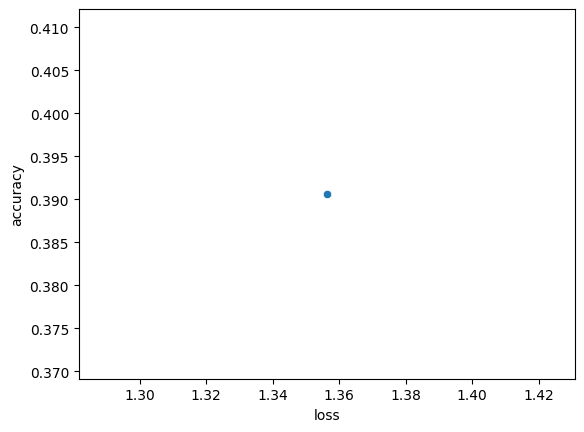

In [128]:
sns.scatterplot(x='loss', y='accuracy', data=df)
